In [29]:
using CSV, DataFrames, CairoMakie, wgregseq, Dates

wgregseq.viz.plotting_style()

2-element Vector{Any}:
 Dict("light_blue" => "#5fa6db", "light_red" => "#e89290", "primary_blue" => "#3373ba", "green" => "#488d48", "pale_red" => "#eeb3b0", "light_green" => "#99d097", "primary_green" => "#5cb75b", "light_black" => "#8c8c8c", "gold" => "#b1843e", "pale_blue" => "#8ec1e8"…)
 ["#4c4b4c", "#3373ba", "#5cb75b", "#8066ad", "#f0ad4d", "#d8534f"]

In [30]:
Date("06/05/2007", dateformat"m/d/y")

2007-06-05

In [31]:
df = CSV.read("../../data/misc/sra_stat.csv", DataFrame)

Row,date,bases,open_access_bases,bytes,open_access_bytes
,String15,Int64,Int64,Int64,Int64
1,06/05/2007,20304190150,20304190150,50496285115,50496285115
2,04/04/2008,39591836573,39591836573,98175829054,98175829054
3,04/05/2008,41196134195,41196134195,102158063571,102158063571
4,04/09/2008,41645296177,41645296177,103295608811,103295608811
5,04/15/2008,41771058665,41771058665,103601716949,103601716949
6,04/17/2008,57166980893,57166980893,136281532630,136281532630
7,04/18/2008,59666402505,59666402505,142020536150,142020536150
8,04/19/2008,59832989101,59832989101,142367865452,142367865452
9,04/21/2008,61634022162,61634022162,146270545189,146270545189


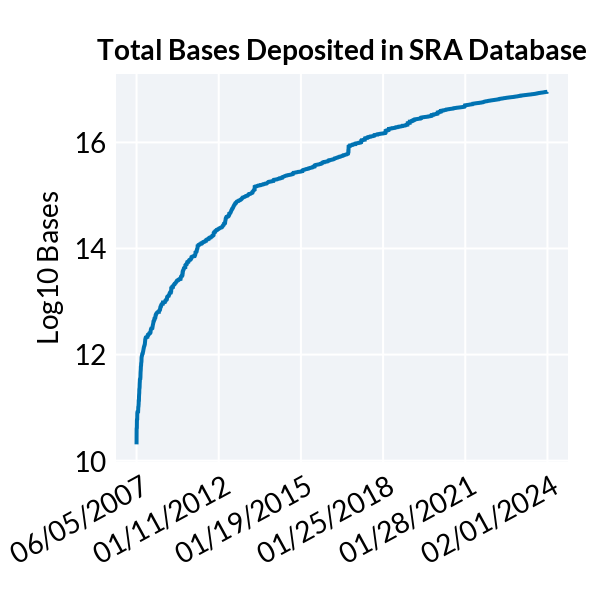

In [36]:
fig = Figure(size=(300, 300))

ax = Axis(
    fig[1, 1], 
    xticks=(1:nrow(df)÷5:nrow(df), df.date[1:nrow(df)÷5:nrow(df)]),
    xticklabelrotation=0.5, 
    yscale=log10, 
    yticks=(10 .^ collect(10:2:16), string.(collect(10:2:16))),
    yminorgridvisible=false,
    ylabel="Log10 Bases",
    #xlabelfont = "Lato",
    ylabelfont = "Lato",
    #xticklabelfont = "Lato",
    #yticklabelfont = "Lato",
    #titlefont = "Lato",
    title = "Total Bases Deposited in SRA Database"
    )

lines!(ax, 1:nrow(df), df.bases, linewidth=2)
save("total_bases_SRA.pdf", fig)
fig